In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy import stats
import seaborn as sns
from itertools import *
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/db/Spotify_Youtube.csv')

Mounted at /content/drive


Будем анализировать датасет с музыкальными композициями из Spotify (https://www.kaggle.com/datasets/salvatorerastelli/spotify-and-youtube)

In [ ]:
df

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20713,20713,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,single,spotify:track:0RtcKQGyI4hr8FgFH1TuYG,0.582,0.926,5.0,...,https://www.youtube.com/watch?v=5SHmKFKlNqI,JUST DANCE HARDSTYLE,SICK LEGEND - Topic,71678.0,1113.0,0.0,Provided to YouTube by Routenote\n\nJUST DANCE...,True,True,9.227144e+06
20714,20714,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,single,spotify:track:3rHvPA8lUnPBkaLyPOc0VV,0.531,0.936,4.0,...,https://www.youtube.com/watch?v=ocTH6KxllDQ,SET FIRE TO THE RAIN HARDSTYLE,SICK LEGEND - Topic,164741.0,2019.0,0.0,Provided to YouTube by Routenote\n\nSET FIRE T...,True,True,1.089818e+07
20715,20715,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,single,spotify:track:4jk00YxPtPbhvHJE9N4ddv,0.443,0.830,4.0,...,https://www.youtube.com/watch?v=5wFhE-HY0hg,OUTSIDE HARDSTYLE SPED UP,SICK LEGEND - Topic,35646.0,329.0,0.0,Provided to YouTube by Routenote\n\nOUTSIDE HA...,True,True,6.226110e+06
20716,20716,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,ONLY GIRL HARDSTYLE,ONLY GIRL HARDSTYLE,single,spotify:track:5EyErbpsugWliX006eTDex,0.417,0.767,9.0,...,https://www.youtube.com/watch?v=VMFLbFRNCn0,ONLY GIRL HARDSTYLE,SICK LEGEND - Topic,6533.0,88.0,0.0,Provided to YouTube by Routenote\n\nONLY GIRL ...,True,True,6.873961e+06


In [ ]:
df.dropna()

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20713,20713,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,single,spotify:track:0RtcKQGyI4hr8FgFH1TuYG,0.582,0.926,5.0,...,https://www.youtube.com/watch?v=5SHmKFKlNqI,JUST DANCE HARDSTYLE,SICK LEGEND - Topic,71678.0,1113.0,0.0,Provided to YouTube by Routenote\n\nJUST DANCE...,True,True,9.227144e+06
20714,20714,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,single,spotify:track:3rHvPA8lUnPBkaLyPOc0VV,0.531,0.936,4.0,...,https://www.youtube.com/watch?v=ocTH6KxllDQ,SET FIRE TO THE RAIN HARDSTYLE,SICK LEGEND - Topic,164741.0,2019.0,0.0,Provided to YouTube by Routenote\n\nSET FIRE T...,True,True,1.089818e+07
20715,20715,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,single,spotify:track:4jk00YxPtPbhvHJE9N4ddv,0.443,0.830,4.0,...,https://www.youtube.com/watch?v=5wFhE-HY0hg,OUTSIDE HARDSTYLE SPED UP,SICK LEGEND - Topic,35646.0,329.0,0.0,Provided to YouTube by Routenote\n\nOUTSIDE HA...,True,True,6.226110e+06
20716,20716,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,ONLY GIRL HARDSTYLE,ONLY GIRL HARDSTYLE,single,spotify:track:5EyErbpsugWliX006eTDex,0.417,0.767,9.0,...,https://www.youtube.com/watch?v=VMFLbFRNCn0,ONLY GIRL HARDSTYLE,SICK LEGEND - Topic,6533.0,88.0,0.0,Provided to YouTube by Routenote\n\nONLY GIRL ...,True,True,6.873961e+06


Видим, что строк с NaN значениями в любом из столбцов - не так уж и много => можно ими пренебречь

In [ ]:
df = df.dropna()

Отбросим выбросы по расчетам квантилей

In [ ]:
categories = ['Duration_ms',  'Energy', 'Tempo', 'Valence', 'Danceability','Loudness','Likes']

for i in categories:
  q1 = df[i].quantile(0.25)
  q2 = df[i].quantile()
  q3 = df[i].quantile(0.75)
  iqr = q3-q1
  left_ej = df[df[i] < q1-1.5*iqr].index
  right_ej = df[df[i] > q3+1.5*iqr].index
  df = df.drop(left_ej)
  df = df.drop(right_ej)

In [ ]:
first = categories[:4]
second = categories[4:]

Визуальный анализ. Построим гистограмы и Q-Q кривые. По гистограммам кажется, 
что нормально распределены почти все показатели треков (кроме лайков), однако Q-Q кривые показывают, что это не так.

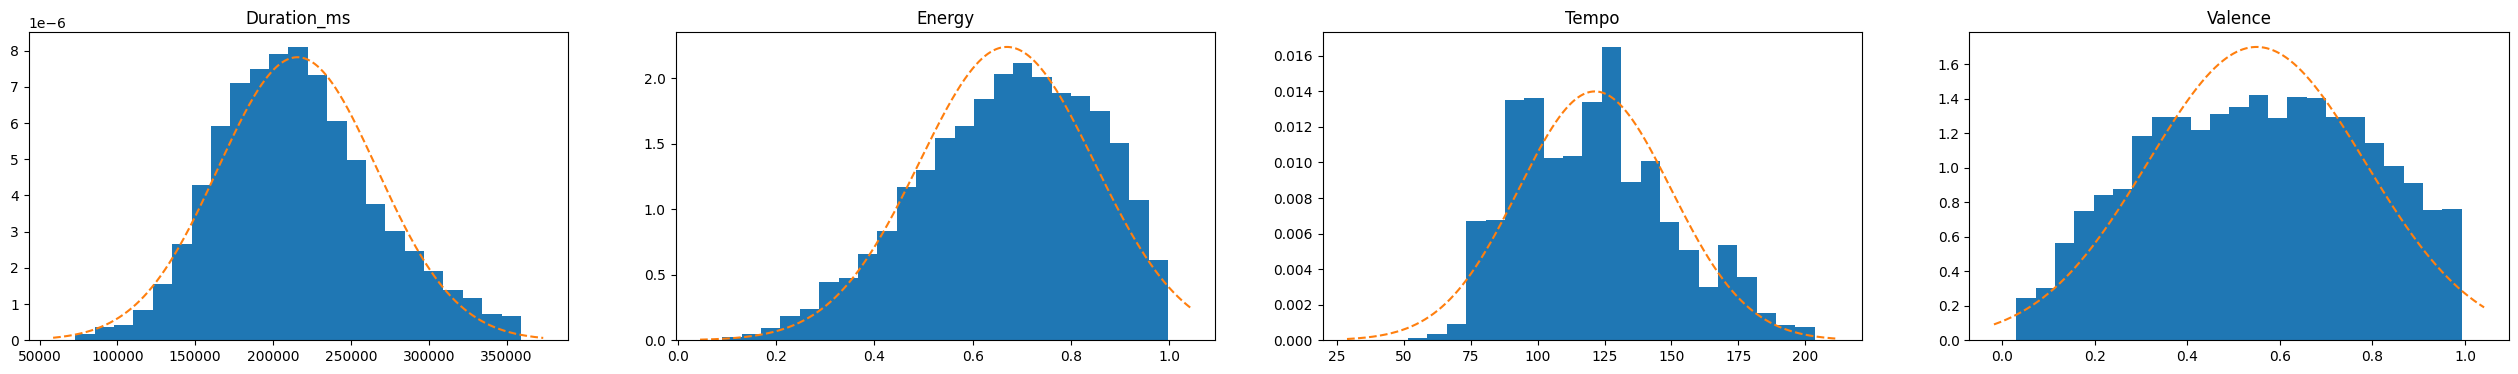

In [ ]:
fig, axes = plt.subplots(ncols=len(first))
fig.set_size_inches(8 * len(first), 4)
axes = axes.flatten()

for key, ax in zip(first, axes):
    ax.hist(df[key], density=True, bins=23)
    
    loc = df[key].mean()
    scale = df[key].std()
    
    x_left, x_right = ax.get_xlim()
    x = np.linspace(x_left, x_right, 10000)
    y = stats.norm.pdf(x, loc=loc, scale=scale)
    
    ax.plot(x, y, linestyle='dashed')
    ax.set_title(key)

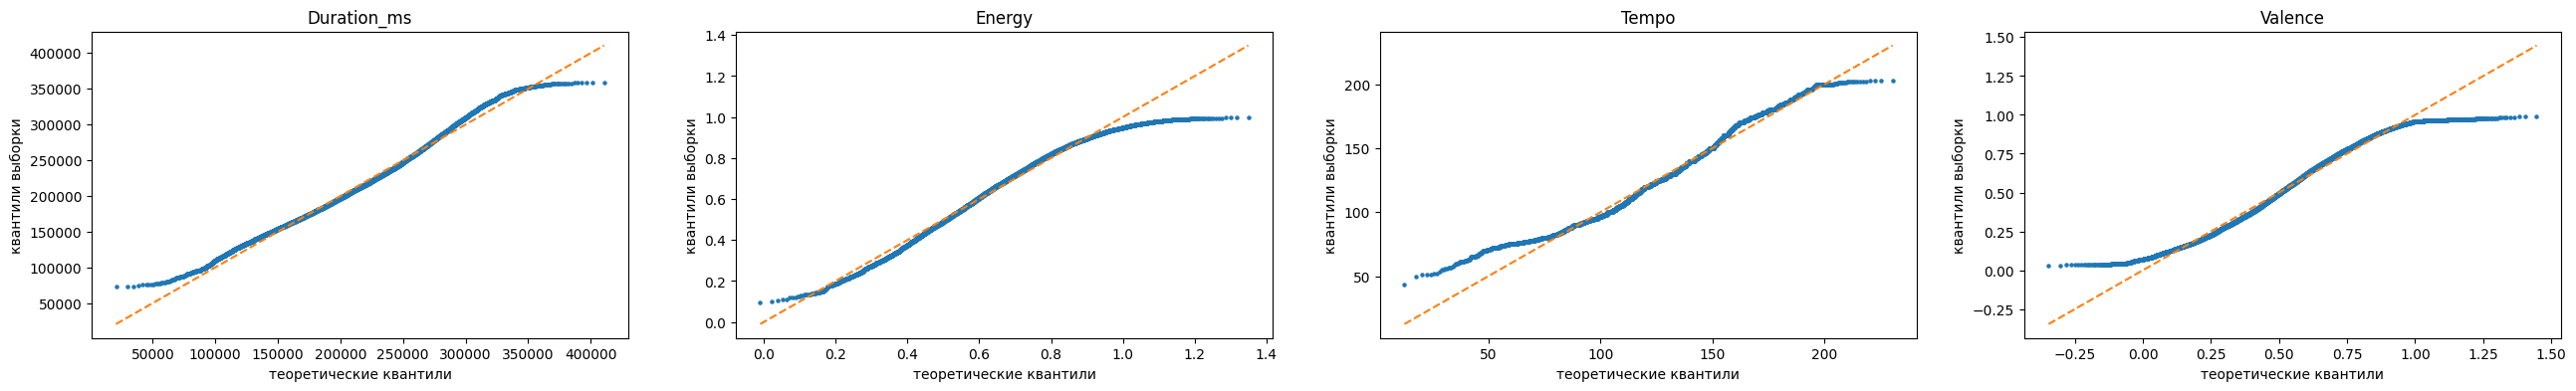

In [ ]:
fig, axes = plt.subplots(ncols=len(first))
fig.set_size_inches(8 * len(first), 4)
axes = axes.flatten()

for key, ax in zip(first, axes):
    samples = df[key]
    
    loc = samples.mean()
    scale = samples.std()
    
    interval = np.linspace(0, 1, samples.shape[0])[1:-1]
    x = stats.norm.ppf(interval, loc=loc, scale=scale)
    y = np.quantile(samples, interval)
    
    ax.scatter(x, y, s=5)
    ax.plot(x, x, color='C1', linestyle='dashed')
    
    ax.set_title(key)
    ax.set_xlabel('теоретические квантили')
    ax.set_ylabel('квантили выборки')

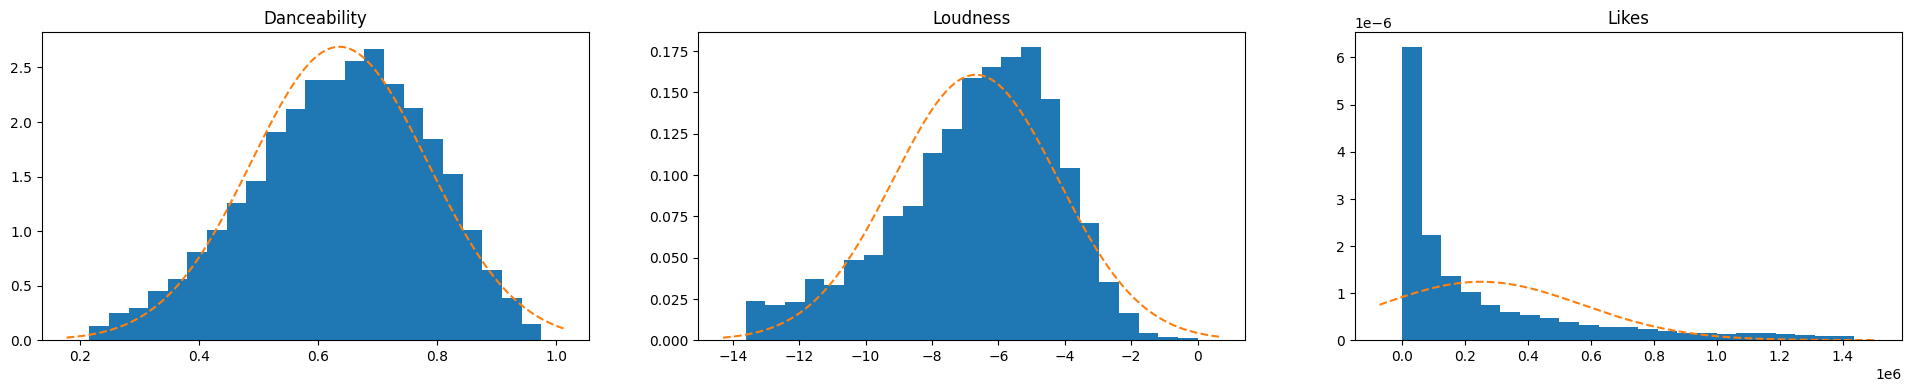

In [ ]:
fig, axes = plt.subplots(ncols=len(second))
fig.set_size_inches(8 * len(second), 4)
axes = axes.flatten()

for key, ax in zip(second, axes):
    ax.hist(df[key], density=True, bins=23)
    
    loc = df[key].mean()
    scale = df[key].std()
    
    x_left, x_right = ax.get_xlim()
    x = np.linspace(x_left, x_right, 10000)
    y = stats.norm.pdf(x, loc=loc, scale=scale)
    
    ax.plot(x, y, linestyle='dashed')
    ax.set_title(key)

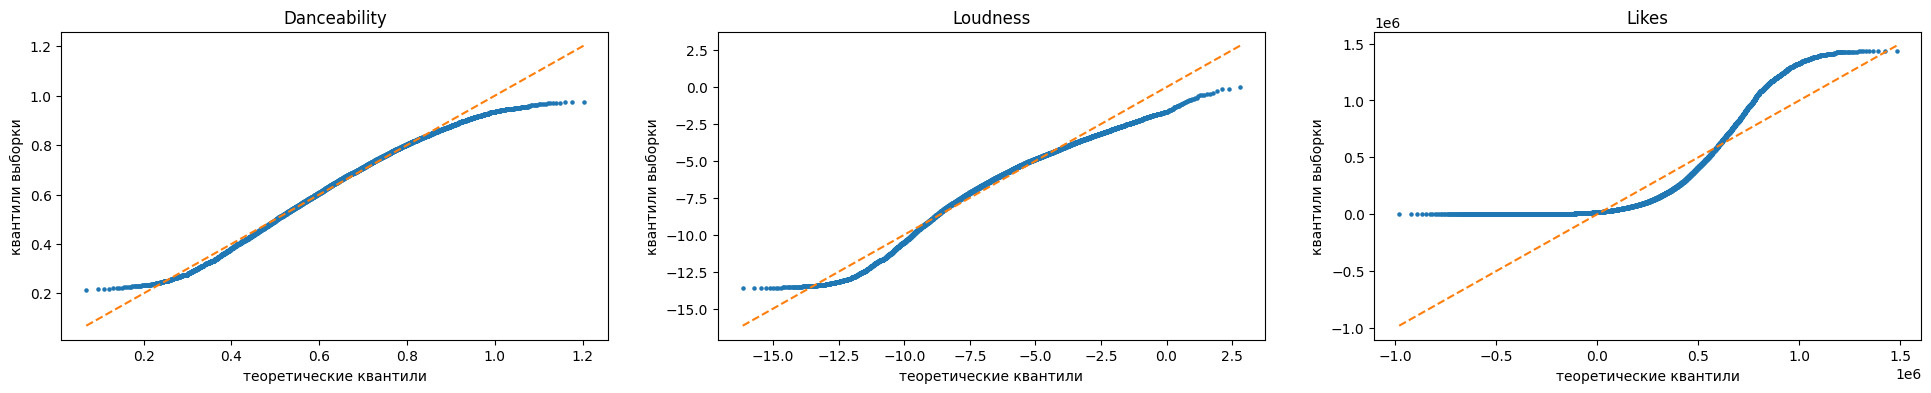

In [ ]:
fig, axes = plt.subplots(ncols=len(second))
fig.set_size_inches(8 * len(second), 4)
axes = axes.flatten()

for key, ax in zip(second, axes):
    samples = df[key]
    
    loc = samples.mean()
    scale = samples.std()
    
    interval = np.linspace(0, 1, samples.shape[0])[1:-1]
    x = stats.norm.ppf(interval, loc=loc, scale=scale)
    y = np.quantile(samples, interval)
    
    ax.scatter(x, y, s=5)
    ax.plot(x, x, color='C1', linestyle='dashed')
    
    ax.set_title(key)
    ax.set_xlabel('теоретические квантили')
    ax.set_ylabel('квантили выборки')

Из графиков выше видно, что наиболее нормальное распределение - это показатель танцевальности трека, его длительность, энергичность и темп/ритм.

In [ ]:
for key in categories:
    print(key)
    
    samples = df[key]
    
    loc = samples.mean()
    scale = samples.std()

    for i in range(1, 4):
        true_value = stats.norm.cdf(i) - stats.norm.cdf(-i)
        sample_value = ((samples >= loc - i * scale) & (samples <= loc + i * scale)).sum() / samples.shape[0]
        
        print(f'Сигм: {i}')
        print(f'\tТеоретическое значение:\t{true_value}')
        print(f'\tФактическое:\t\t{sample_value}')
        
    print()

Duration_ms
Сигм: 1
	Теоретическое значение:	0.6826894921370859
	Фактическое:		0.6850509930220076
Сигм: 2
	Теоретическое значение:	0.9544997361036416
	Фактическое:		0.9476650563607085
Сигм: 3
	Теоретическое значение:	0.9973002039367398
	Фактическое:		1.0

Energy
Сигм: 1
	Теоретическое значение:	0.6826894921370859
	Фактическое:		0.6467391304347826
Сигм: 2
	Теоретическое значение:	0.9544997361036416
	Фактическое:		0.9662506709608158
Сигм: 3
	Теоретическое значение:	0.9973002039367398
	Фактическое:		0.998792270531401

Tempo
Сигм: 1
	Теоретическое значение:	0.6826894921370859
	Фактическое:		0.6652576489533011
Сигм: 2
	Теоретическое значение:	0.9544997361036416
	Фактическое:		0.9649087493290391
Сигм: 3
	Теоретическое значение:	0.9973002039367398
	Фактическое:		1.0

Valence
Сигм: 1
	Теоретическое значение:	0.6826894921370859
	Фактическое:		0.6205716586151369
Сигм: 2
	Теоретическое значение:	0.9544997361036416
	Фактическое:		0.9871175523349437
Сигм: 3
	Теоретическое значение:	0.99730020393673

Как и было сказано раньше, Лайки и показатель позитивности трека (Valence) имеют менее нормальное распределение, нежели остальные показатели

# Гипотеза: танцевальность и энергичность трека зависят от его темпа

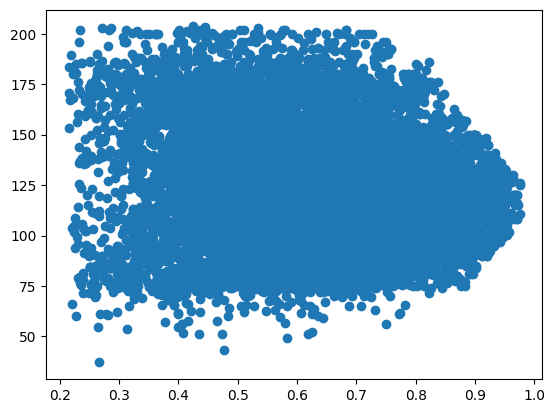

In [ ]:
plt.scatter(df['Danceability'], df['Tempo'])
plt.show()

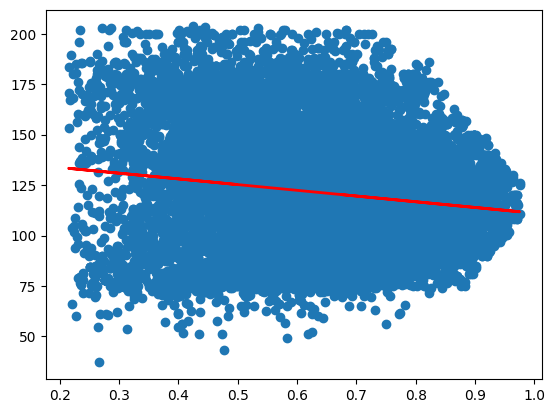

In [ ]:
model =  LinearRegression()
x = np.array(df['Danceability'].tolist()).reshape((-1, 1))
y = df['Tempo'].tolist()
model.fit(x, y)
y_pred = model.predict(x)
plt.scatter(x, y)
plt.plot(x, y_pred, color='red', linewidth=2);
plt.show()

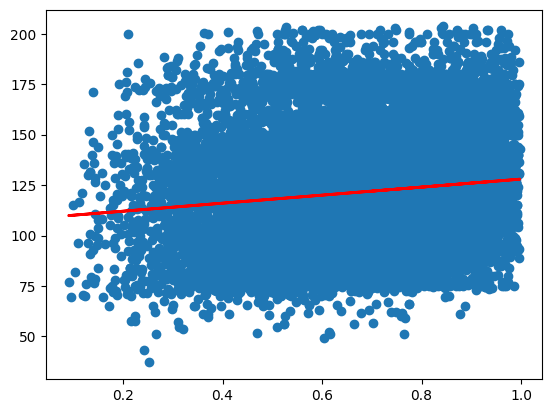

In [ ]:
model =  LinearRegression()
x = np.array(df['Energy'].tolist()).reshape((-1, 1))
y = df['Tempo'].tolist()
model.fit(x, y)
y_pred = model.predict(x)
plt.scatter(x, y)
plt.plot(x, y_pred, color='red', linewidth=2);
plt.show()

Как мы видим, в обоих случаях зависимость невелика, но все-таки есть: Спотифай считает "танцевальной" музыку, под которую можно действительно двигаться в ритм, т.к. под треки с большим значением BPM танцевать невозможно (если, конечно, не считать хаотичные телодвижения во время прослушивания техно). Энергичность слабее зависит от ритма, однако все же эта зависимость имеет место быть - медленные треки редко бывают энергичными

# Гипотеза: количество лайков трека зависят от его танцевальности

In [ ]:
df['Danceability'].quantile()

0.646

In [ ]:
df1 = df[df['Danceability']<0.646]
df2 = df[df['Danceability']>=0.646]

Разделим выборку по 50%'му квантилю танцевальности и проанализируем зависимость

In [ ]:
def var_analise(df, df1, df2, f):
  all1 = df1.shape[0]
  all2 = df2.shape[0]
  res1_mean = df1[f].mean()
  res2_mean = df2[f].mean()
  res_mean = df[f].mean()
  SS_b = all1 * (res1_mean - res_mean) ** 2 + all2 * (res2_mean - res_mean) ** 2
  SS_w = ((df1[f] - res1_mean) ** 2).sum() + ((df2[f]- res2_mean) ** 2).sum()

  k = 2
  n = all1 + all2
  k1 = k - 1
  k2 = n - k
  sigma2_b = SS_b / k1
  sigma2_w = SS_w / k2
  sigma2_b, sigma2_w

  F = sigma2_b / sigma2_w

  alpha = 0.05

  t = stats.f.ppf(1 - alpha, k1, k2)

  return F>t

In [ ]:
var_analise(df,df1,df2,'Likes')

True

In [ ]:
res1_mean = df1['Likes'].mean()
res2_mean = df2['Likes'].mean()

print(f'Среднее кол-во лайков треков в нижней половине "танцевальности": {res1_mean}, в верхней: {res2_mean}')

Среднее кол-во лайков треков в нижней половине "танцевальности": 232428.72327551432, в верхней: 268580.3934645775


In [ ]:
var_analise(df,df1,df2,'Tempo')

True

In [ ]:
res1_mean = df1['Tempo'].mean()
res2_mean = df2['Tempo'].mean()

print(f'Средний темп нижней половины треков по "танцевальности" (нетанцевальных): {res1_mean}, верхней (танцевальных): {res2_mean}')

Средний темп нижней половины треков по "танцевальности" (нетанцевальных): 124.77917964232891, верхней (танцевальных): 118.02682215079683


Так же видим, что темп действильно в какой-то степени зависит от танцевальности трека (и наоборот) - под слишком ритмичные треки танцевать сложно

In [ ]:
var_analise(df,df1,df2,'Loudness')

True

In [ ]:
res1_mean = df1['Loudness'].mean()
res2_mean = df2['Loudness'].mean()

print(f'Громкость нетанцевальных треков: {res1_mean}, танцевальных: {res2_mean}')

Громкость нетанцевальных треков: -6.872197256958452, танцевальных: -6.48883286460426


In [ ]:
var_analise(df,df1,df2,'Acousticness')

True

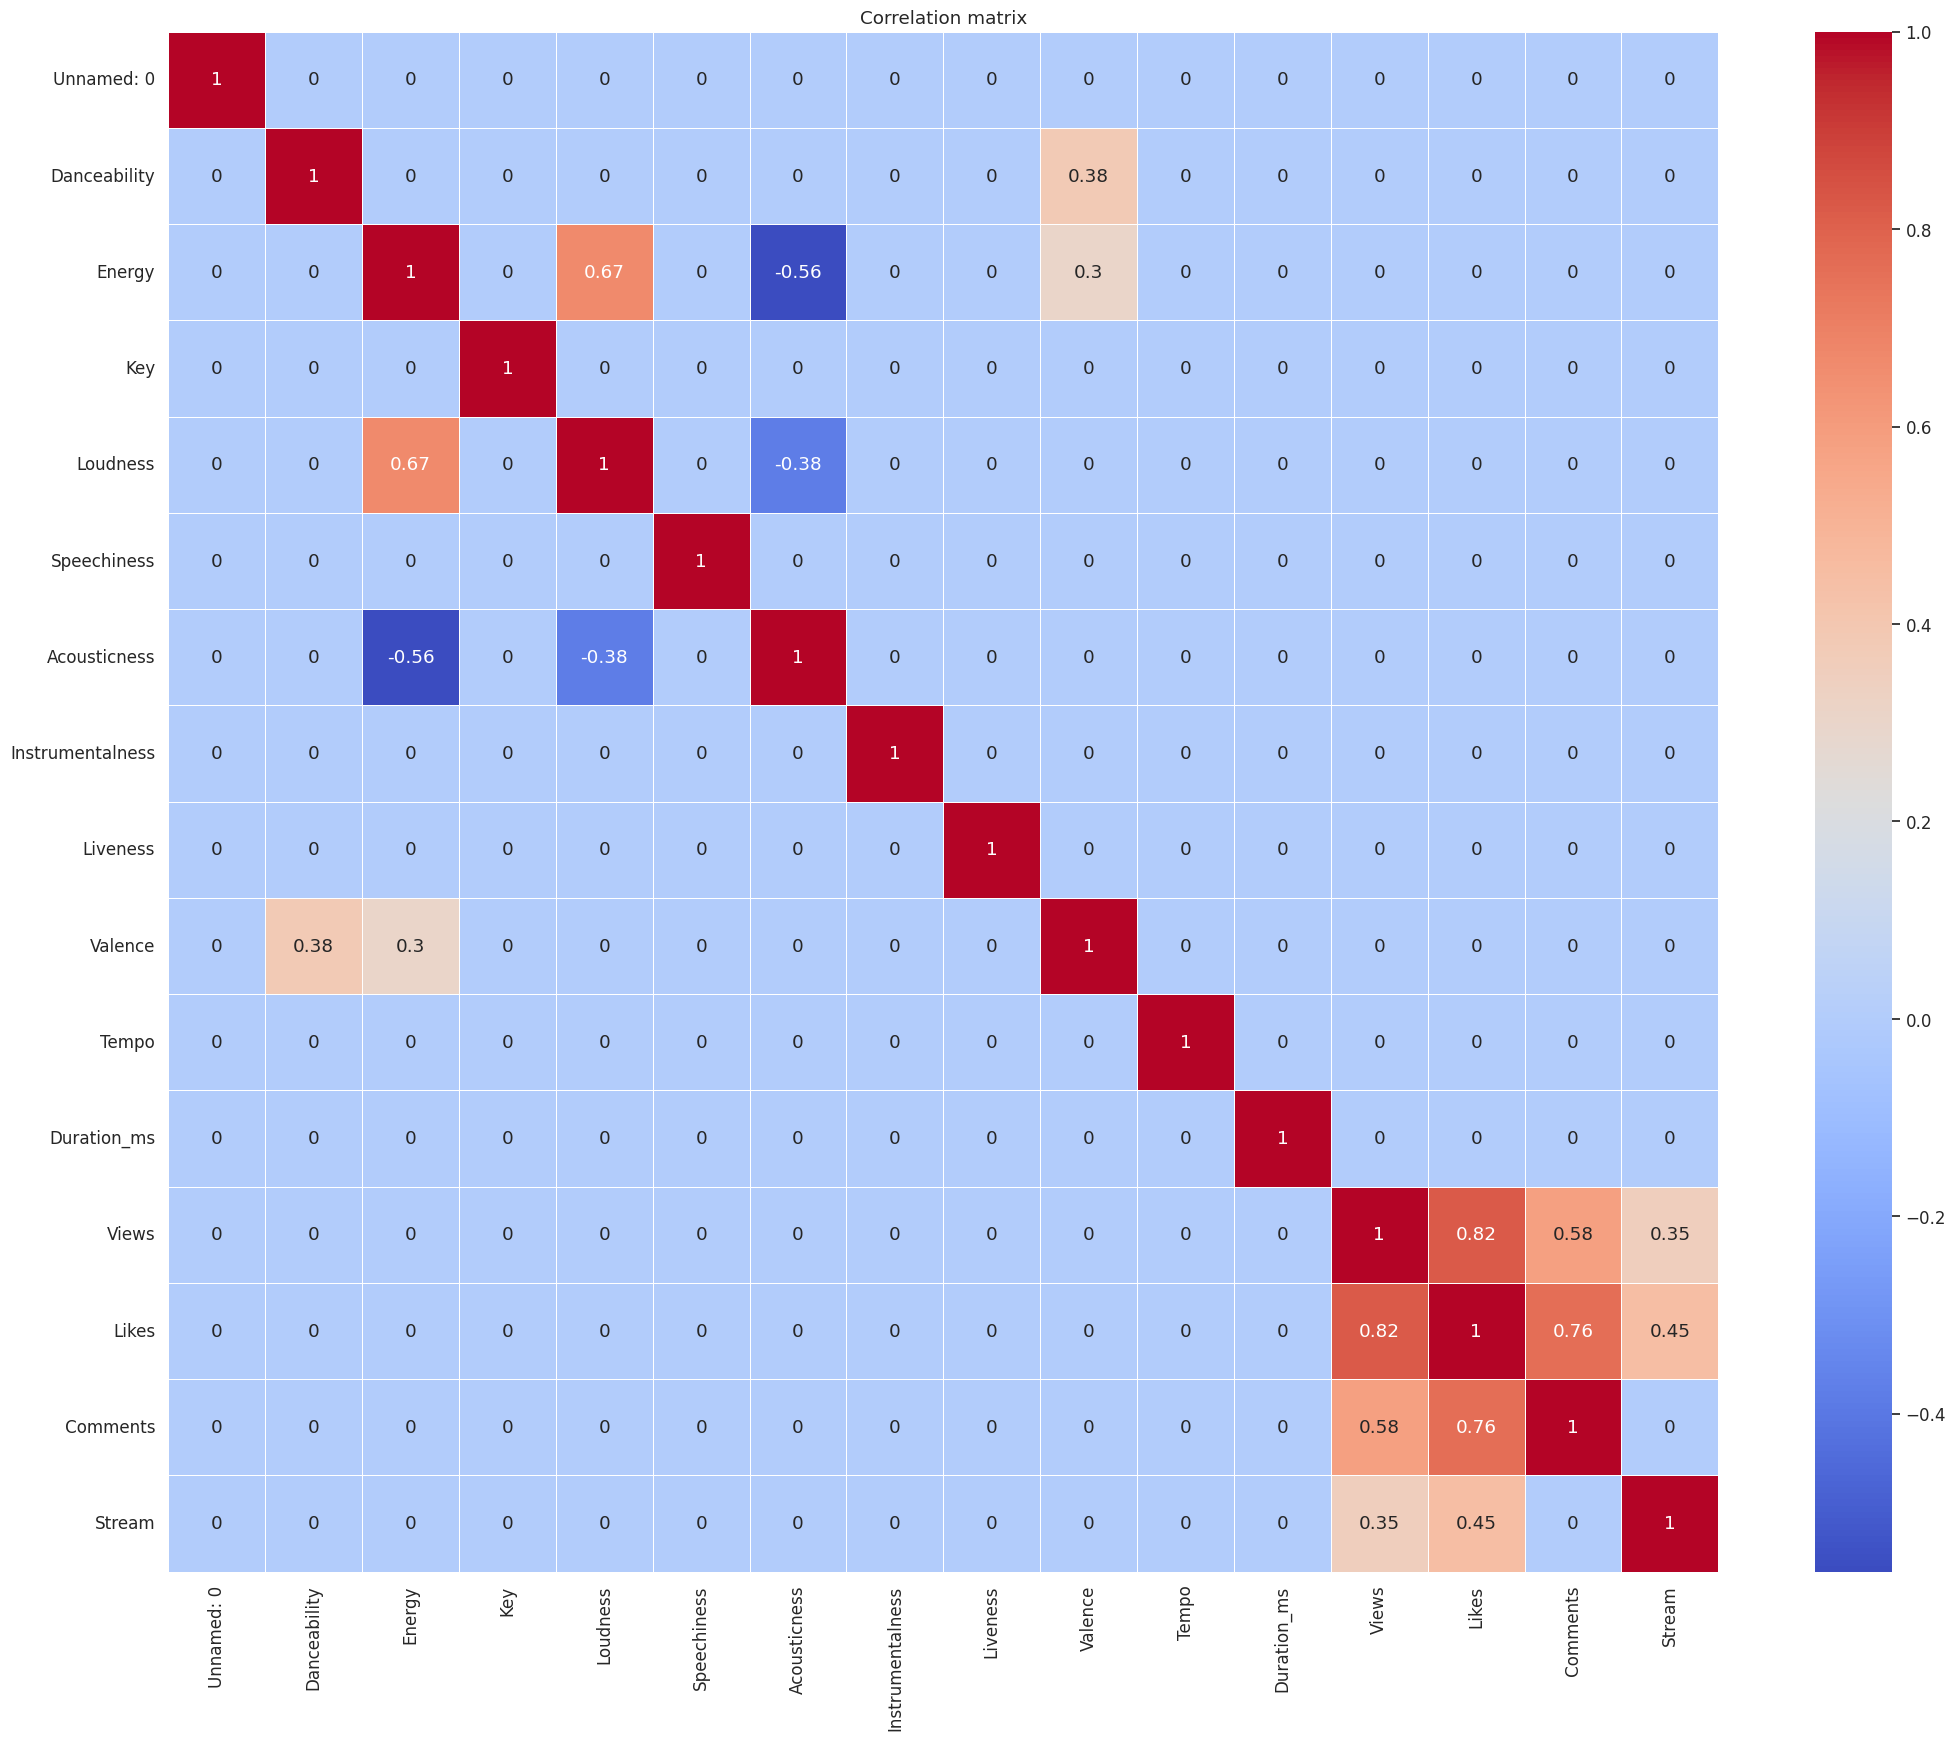

In [ ]:
seperated_genres = df['Danceability']
dataset_with_genres = pd.concat([df, seperated_genres], axis = 1, sort = False)
list_of_genres = df['Danceability']
plt.figure(figsize = (25,20))

sns.set(font_scale=1.1)

corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

Матрица корреляции показывает:
- очевидную зависимость между лайками, комментариями и просмотрами
- Энергичность треков с их громкостью и "позитивностью"
- Акустичность мелодии с энергичностью - видна обратная зависимость, что довольно логично: как правило, энергичными считаются композиции, в основе которых лежит бит и какой-то семпл, а не мелодия живого инструмента. Аналогична и зависимость акустичности с шумностью трека: все песни с акустикой, как правило, не такие громкие.

В заключение можно сказать, что почти все гипотезы подтвердились и довольно очевидные зависимости действительно имеют место быть, однако не в той степени, в которой нам бы этого хотелось.

# Гипотеза: зависит ли число лайков от типа публикации (альбом/сингл)

In [ ]:
df['Album_type'].value_counts().index.tolist()

['album', 'single', 'compilation']

<Axes: ylabel='Album_type'>

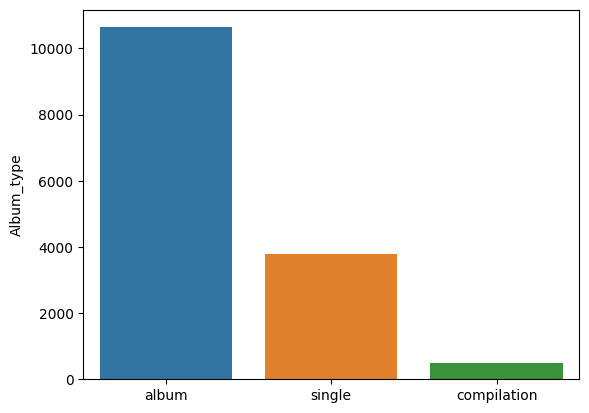

In [ ]:
sns.barplot(x = df['Album_type'].value_counts().index.tolist(),y=df['Album_type'].value_counts())

In [ ]:
albums = df[df['Album_type']=="album"]
singles = df[df['Album_type']=="single"]

In [ ]:
var_analise(df,albums,singles,'Likes')

False

In [ ]:
mean1 = albums['Likes'].mean()
mean2 = singles['Likes'].mean()

print(f'Среднее кол-во лайках на альбомах: {mean1}, на синглах: {mean2}')

Среднее кол-во лайках на альбомах: 252404.33142212615, на синглах: 246414.51322751323


In [ ]:
compilations = df[df['Album_type']=="compilation"]
var_analise(df,albums,compilations,'Likes')
mean3 = compilations['Likes'].mean()
print(f'Среднее кол-во лайках на альбомах: {mean1}, комплиляции: {mean3}')

Среднее кол-во лайках на альбомах: 252404.33142212615, комплиляции: 241826.12577319588
